# Scatterplots with Categorical Variables - Practice

Let's get more R practice plotting with categorical variables using mtcars. There will be less guidance, so look at your prior notebooks or the solution if you get stuck.

## R Features
* library()
* glimpse()
* ggplot()
* geom_jitter()
* geom_smooth()
* as.factor()
* facet_wrap()
* facet_grid()

## Datasets
* mtcars

In [1]:
# Load libraries
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
# Explore the data structure
# Data: mtcars
glimpse(mtcars)

Observations: 32
Variables: 11
$ mpg  <dbl> 21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17...
$ cyl  <dbl> 6, 6, 4, 6, 8, 6, 8, 4, 4, 6, 6, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4,...
$ disp <dbl> 160.0, 160.0, 108.0, 258.0, 360.0, 225.0, 360.0, 146.7, 140.8,...
$ hp   <dbl> 110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, ...
$ drat <dbl> 3.90, 3.90, 3.85, 3.08, 3.15, 2.76, 3.21, 3.69, 3.92, 3.92, 3....
$ wt   <dbl> 2.620, 2.875, 2.320, 3.215, 3.440, 3.460, 3.570, 3.190, 3.150,...
$ qsec <dbl> 16.46, 17.02, 18.61, 19.44, 17.02, 20.22, 15.84, 20.00, 22.90,...
$ vs   <dbl> 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...
$ am   <dbl> 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,...
$ gear <dbl> 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3,...
$ carb <dbl> 4, 4, 1, 1, 2, 1, 4, 2, 2, 4, 4, 3, 3, 3, 4, 4, 4, 1, 2, 1, 1,...


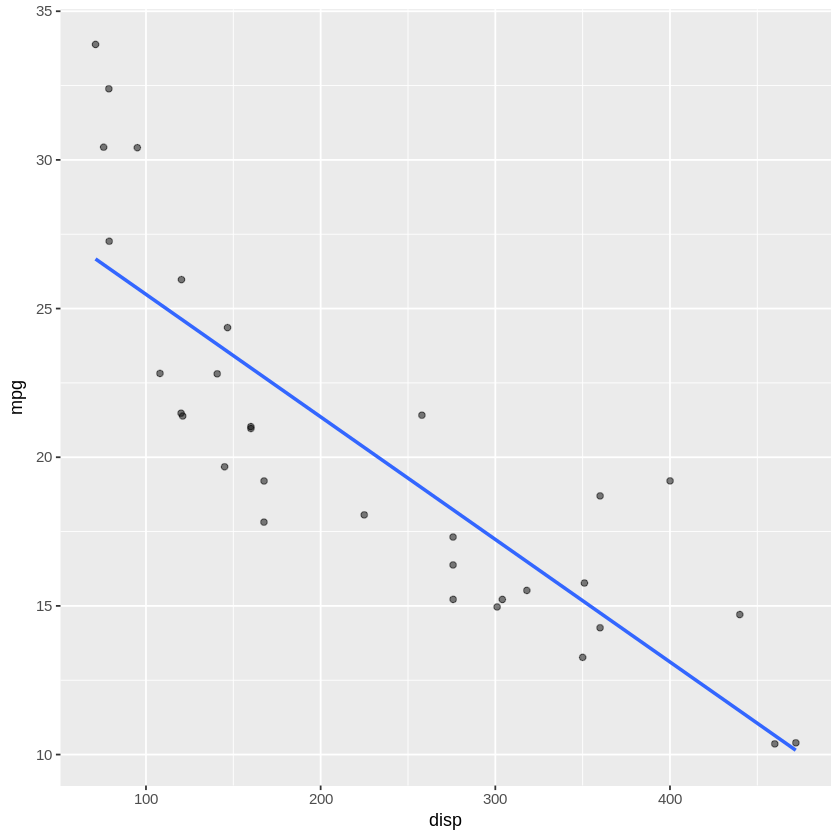

In [3]:
# Start with a baseline plot
# mtcars: mpg vs disp
# +jitter; +alpha; +trend
ggplot(mtcars, mapping = aes(x = disp, y = mpg)) + 
   geom_jitter(alpha = 0.5) + 
   geom_smooth(method = "lm", se = FALSE)


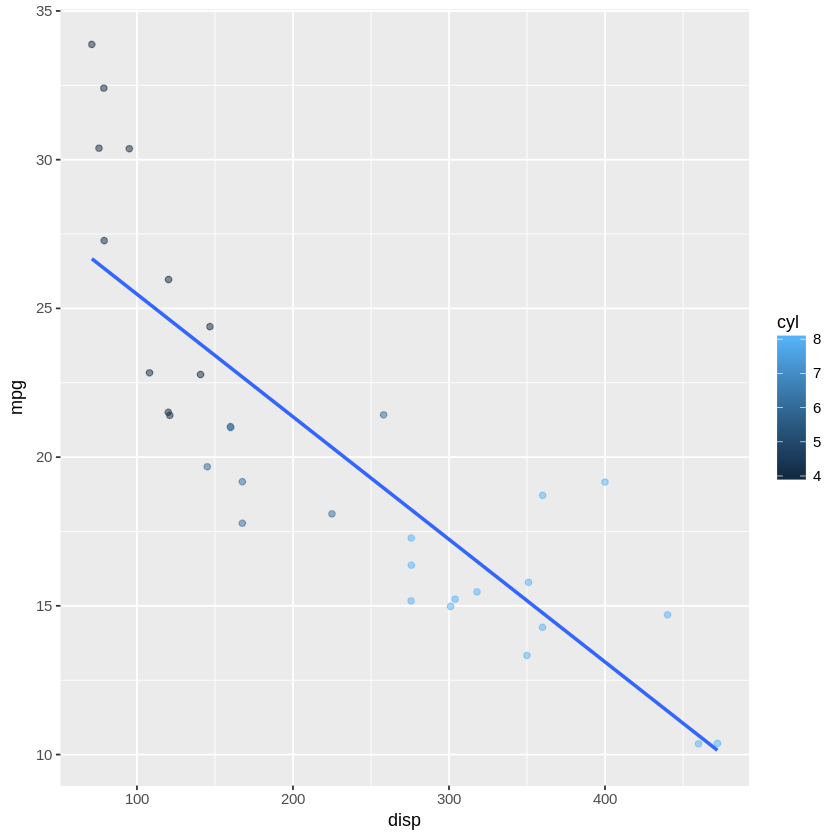

In [4]:
# Map color to cyl

# mtcars: mpg vs disp
# +jitter; +alpha; +trend
ggplot(mtcars, mapping = aes(x = disp, y = mpg, color = cyl)) + 
   geom_jitter(alpha = 0.5) + 
   geom_smooth(method = "lm", se = FALSE)

# Notice it decided to map color to a continuous range

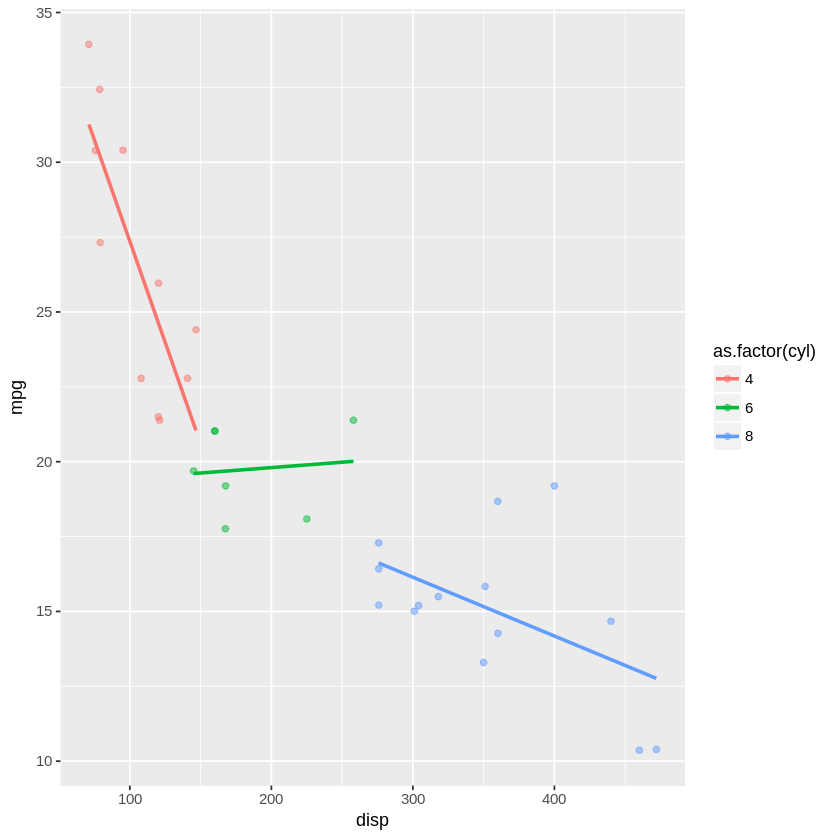

In [5]:
# Change cyl to a categorical variable
# mtcars: mpg vs disp
# +jitter; +alpha; +trend; +color = cyl
# Change cyl to a categorical variable 
# so ggplot will use more distinct colors
# One way is to wrap the variable in as.factor()

ggplot(mtcars, mapping = aes(x = disp, y = mpg, color = as.factor(cyl))) +  # Don't forget the closing parenthesis
   geom_jitter(alpha = 0.5) + 
   geom_smooth(method = "lm", se = FALSE)

# Now we get more distinct colors making it much easier to analyze
# Also notice as a side effect of inheriting the color mapping to all geoms
# that geom_smooth got the color mapping too. 
# So it calculated a linear trend line for each category of cyl
# Take a look at the 6 cylinder trend line. Interesting.

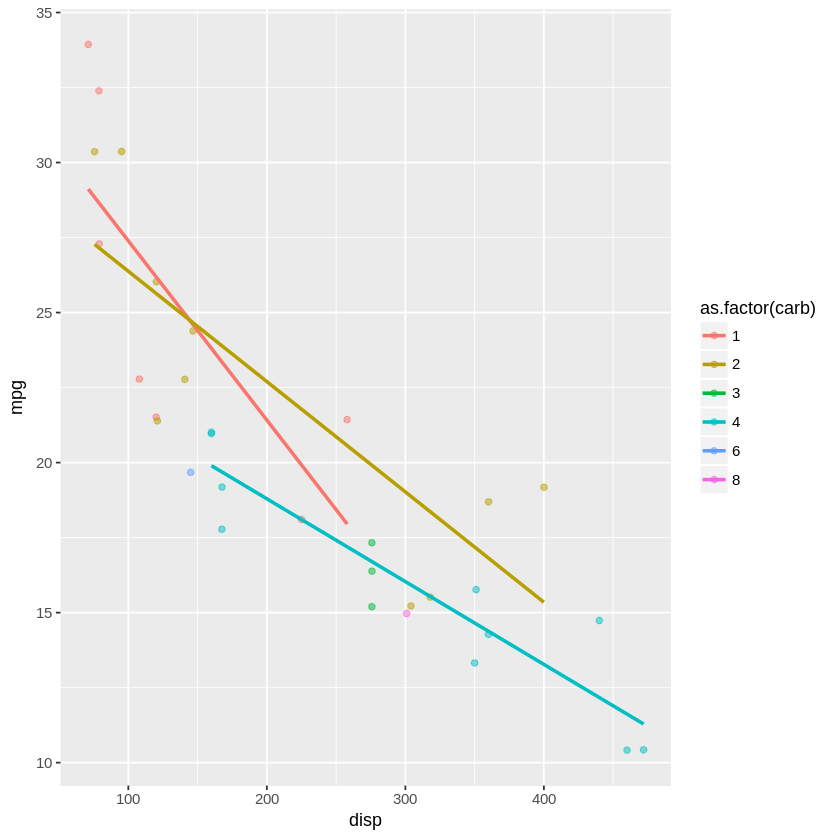

In [6]:
# Let's try another variable, carb instead of cyl
# carb is the number of carburators the engine has

# mtcars: mpg vs disp
# +jitter; +alpha; +trend; +color = carb
# Change cyl to carb and we still need the as.factor() 
ggplot(mtcars, mapping = aes(x = disp, y = mpg, color = as.factor(carb))) +  
   geom_jitter(alpha = 0.5) + 
   geom_smooth(method = "lm", se = FALSE)

# It looks like 4-barrel carbs are least inefficient 
# as engine size increases based upon the slope

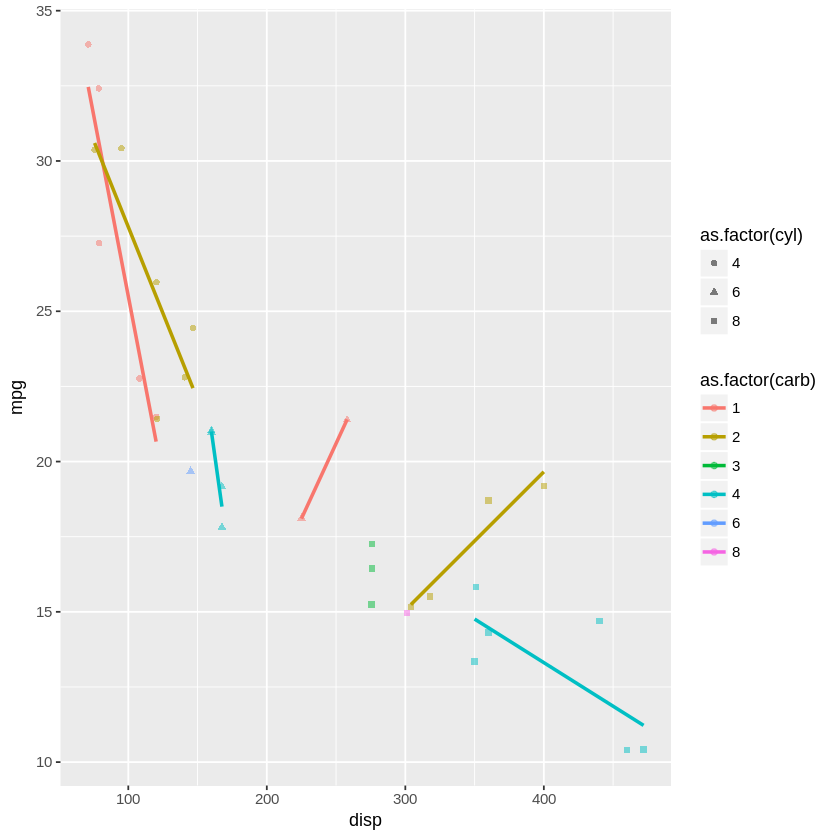

In [11]:
# Let's add cyl back in mapped to shape

# Scatterplot mtcars: mpg vs disp
# +jitter; +alpha; +trend; 
# +color = class; +shape = cyl
# Change cyl to carb  
ggplot(mtcars, mapping = aes(x = disp, y = mpg, color = as.factor(carb), shape = as.factor(cyl))) +  # Count those parenthesis
   geom_jitter(alpha = 0.5) + 
   geom_smooth(method = "lm", se = FALSE)

# Wow, look at those upward trends
# Another example of Simpson's paradox

Let's now try faceting with facet_wrap() and facet_grid(). Recall the formula syntax for wrap is: ~ a and grid is: a ~ b, . ~ b, a ~ .

In [12]:
# Let's get into the habit of seeing the usage help on new functions
?facet_wrap

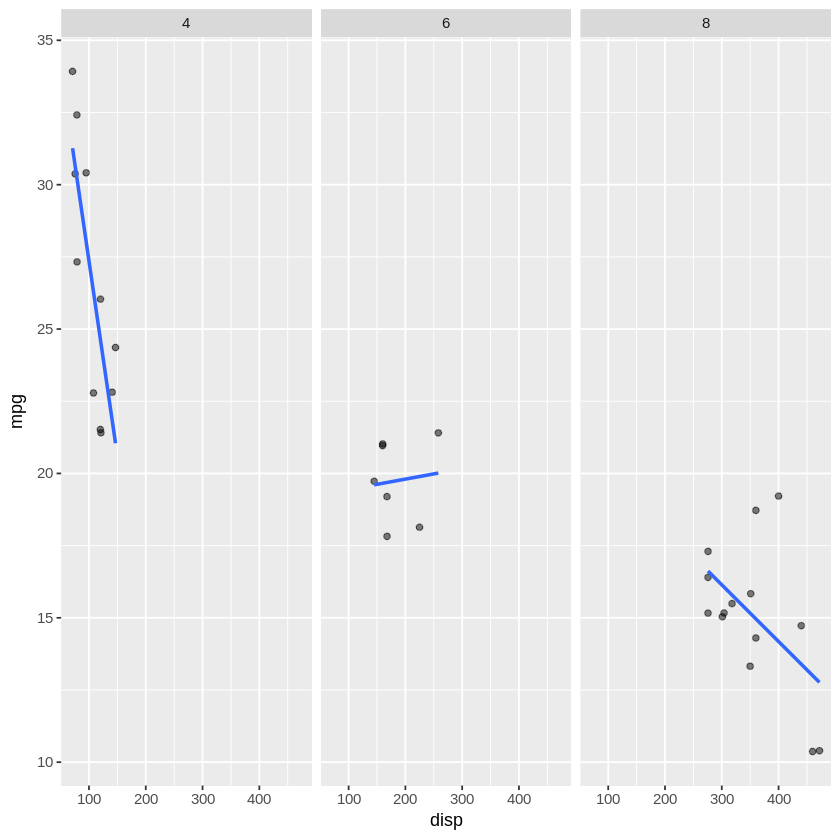

In [13]:
# Let's use facet_wrap for cyl

# mtcars: mpg vs disp
# +jitter; +alpha; +trend; 
# facet = cyl
# Add facet_wrap() using the plus chain operator
# The method for passing in the value uses
# R's formula method. This includes a ~ followed 
# by the variable name like ~ cyl
# We don't have to explicitly cast it with as.factor
# since facet wrap just uses the values directly

ggplot(mtcars, mapping = aes(x = disp, y = mpg)) +  
   geom_jitter(alpha = 0.5) + 
   geom_smooth(method = "lm", se = FALSE) + 
   facet_wrap( ~ cyl)

# Notice how the x and y axis are shared by the plot
# Having a shared scale can reveal insights
# Look at the slope of trend lines
# Notice that different cylinder engines 
# affect fuel efficency differently in relation to engine displacement
# Yes, I really want to filter out the 5 cylinder vehicles
# We will learn how to do this soon.

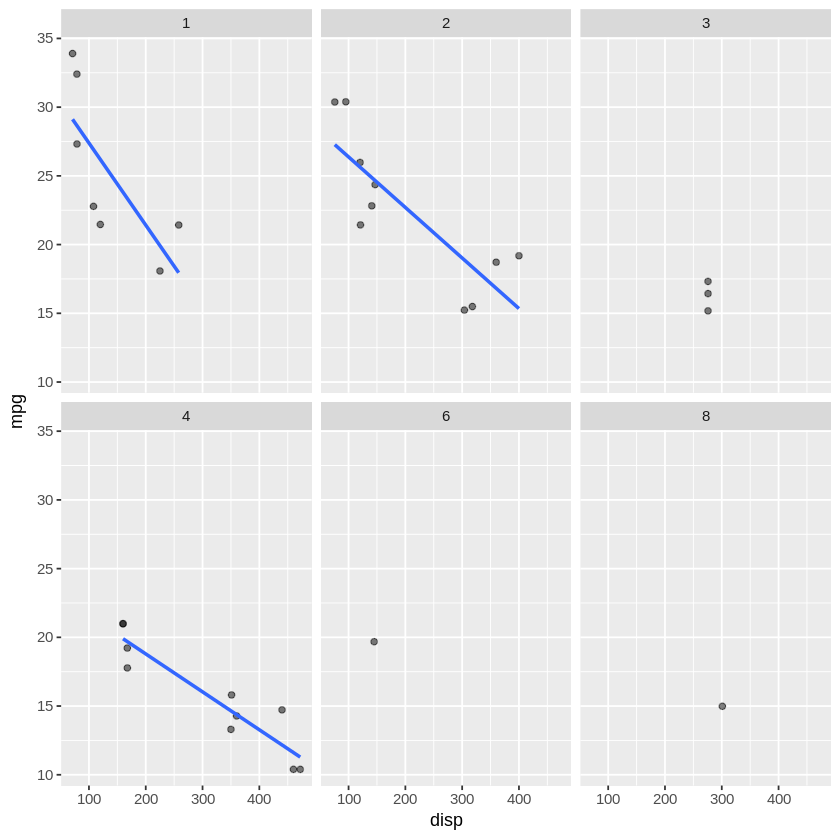

In [14]:
# Let's use facet_wrap for carb

# mtcars: mpg vs disp
# +jitter; +alpha; +trend; 
# facet = carb
# Add facet_wrap() using the plus chain operator

ggplot(mtcars, mapping = aes(x = disp, y = mpg)) +  
   geom_jitter(alpha = 0.5) + 
   geom_smooth(method = "lm", se = FALSE) + 
   facet_wrap( ~ carb)

# Notice that slope for all vehicle classes are down
# With so few data points, it cannot create trend lines

In [19]:
# Let's check out the help for facet_grid()
?facet_grid

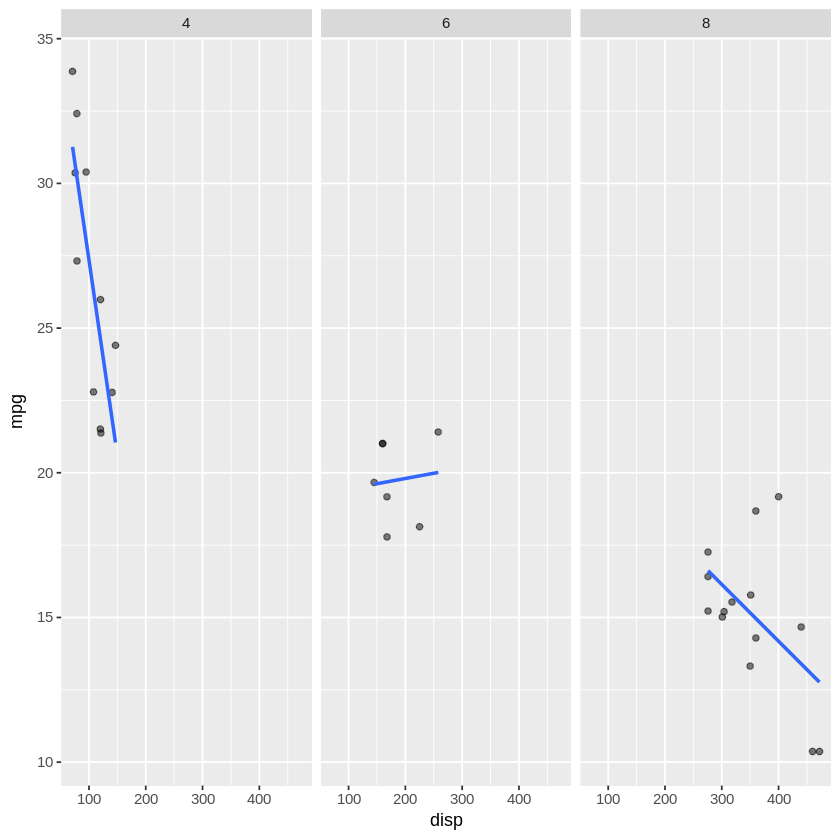

In [16]:
# Let's use facet_grid for cyl only

# mtcars: mpg vs disp
# +jitter; +alpha; +trend; 
# facet column = cyl
# Add facet_grid() using the plus chain operator

ggplot(mtcars, mapping = aes(x = disp, y = mpg)) +  
   geom_jitter(alpha = 0.5) + 
   geom_smooth(method = "lm", se = FALSE) + 
   facet_grid(. ~ cyl)

# Interesting 6-cylinder trend

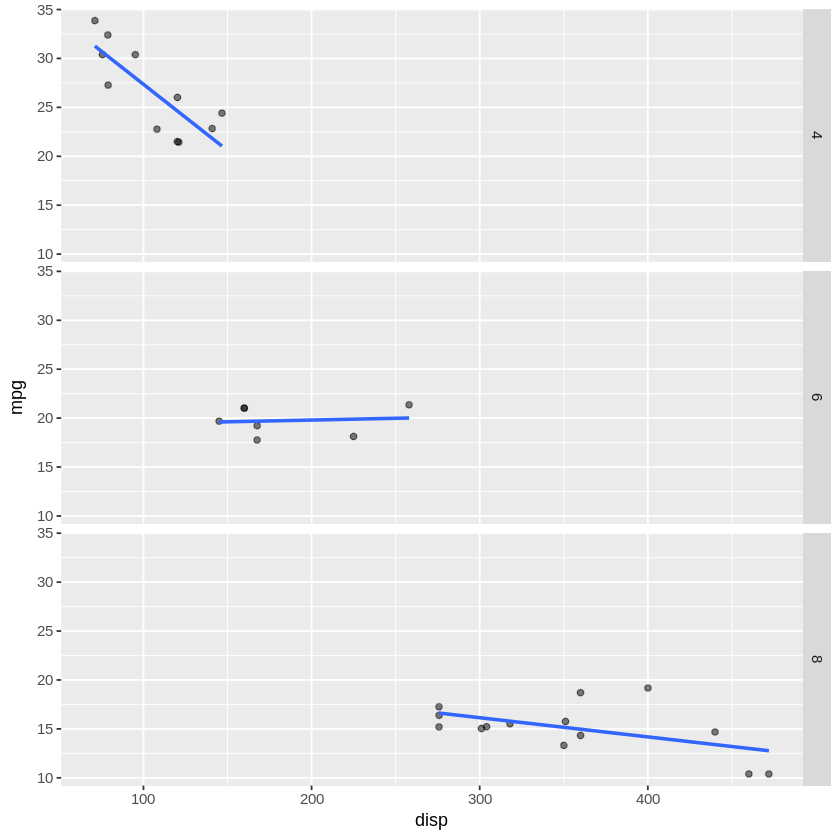

In [17]:
# Contrast this by facetting cyl as rows

# mtcars: mpg vs disp
# +jitter; +alpha; +trend; 
# facet column = cyl
# Add facet_grid() using the plus chain operator

ggplot(mtcars, mapping = aes(x = disp, y = mpg)) +  
   geom_jitter(alpha = 0.5) + 
   geom_smooth(method = "lm", se = FALSE) + 
   facet_grid(cyl ~ .)

# The slopes seem less aggressive now
# Aside from the aspect ratio, the choice
# of columns vs rows reveals the relationship of 
# one or the other more clearly

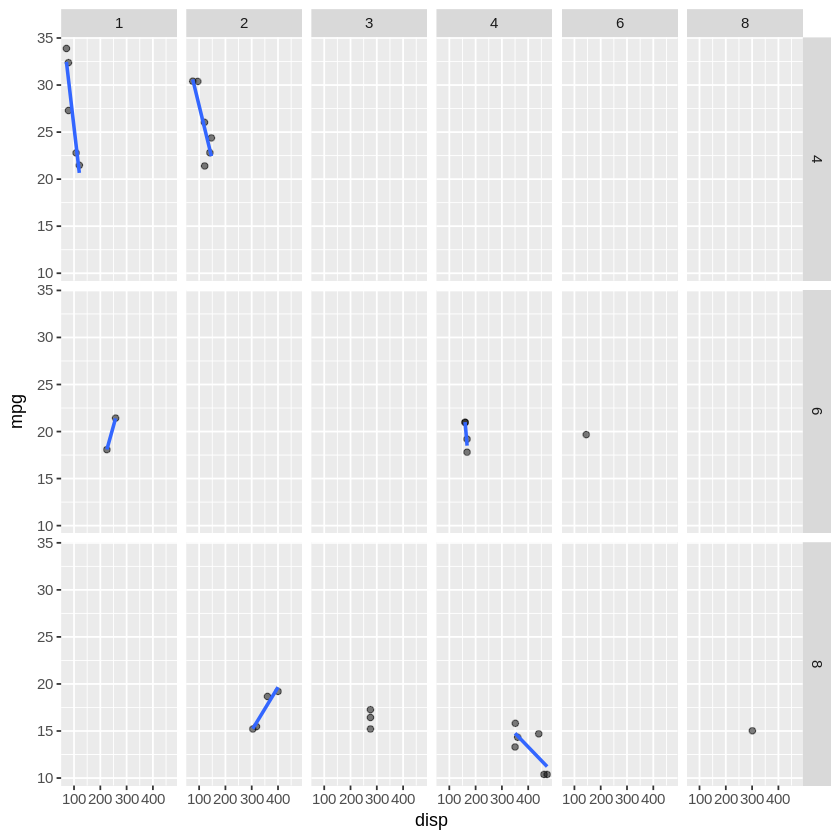

In [20]:
# Facet by both cyl and carb

# carb: mpg vs disp
# +jitter; +alpha; +trend; 
# facet row = cyl
# facet col = carb
# Add facet_grid() using the plus chain operator

ggplot(mtcars, mapping = aes(x = disp, y = mpg)) +  
   geom_jitter(alpha = 0.5) + 
   geom_smooth(method = "lm", se = FALSE) + 
   facet_grid(cyl ~ carb)

# Now the small number of observations 
# is really noticeable
# Can you trust the conclusions
# with so few data points?

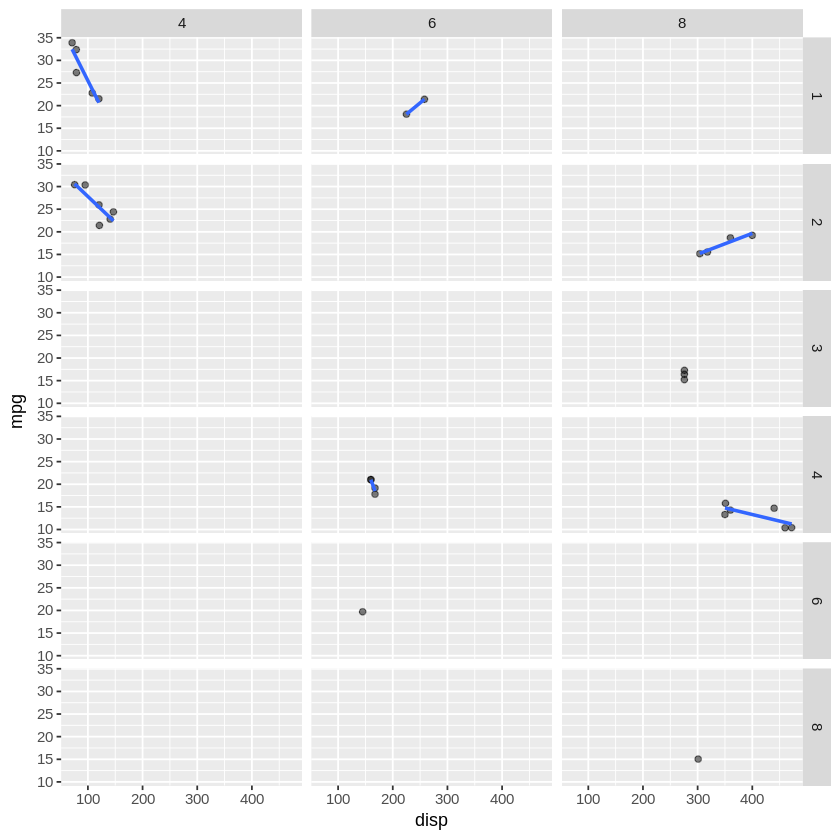

In [21]:
# Facet by both cyl and carb
# this time switch rows and columns

# mtcars: mpg vs disp
# +jitter; +alpha; +trend; 
# facet row = class
# facet col = cyl
# Add facet_grid() using the plus chain operator

ggplot(mtcars, mapping = aes(x = disp, y = mpg)) +  
   geom_jitter(alpha = 0.5) + 
   geom_smooth(method = "lm", se = FALSE) + 
   facet_grid(carb ~ cyl)

# Not enough data for me to feel comfortable with

Let's put all the lines of code together to see the bigger picture of what we ended up with. 

Observations: 32
Variables: 11
$ mpg  <dbl> 21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17...
$ cyl  <dbl> 6, 6, 4, 6, 8, 6, 8, 4, 4, 6, 6, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4,...
$ disp <dbl> 160.0, 160.0, 108.0, 258.0, 360.0, 225.0, 360.0, 146.7, 140.8,...
$ hp   <dbl> 110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, ...
$ drat <dbl> 3.90, 3.90, 3.85, 3.08, 3.15, 2.76, 3.21, 3.69, 3.92, 3.92, 3....
$ wt   <dbl> 2.620, 2.875, 2.320, 3.215, 3.440, 3.460, 3.570, 3.190, 3.150,...
$ qsec <dbl> 16.46, 17.02, 18.61, 19.44, 17.02, 20.22, 15.84, 20.00, 22.90,...
$ vs   <dbl> 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...
$ am   <dbl> 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,...
$ gear <dbl> 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3,...
$ carb <dbl> 4, 4, 1, 1, 2, 1, 4, 2, 2, 4, 4, 3, 3, 3, 4, 4, 4, 1, 2, 1, 1,...


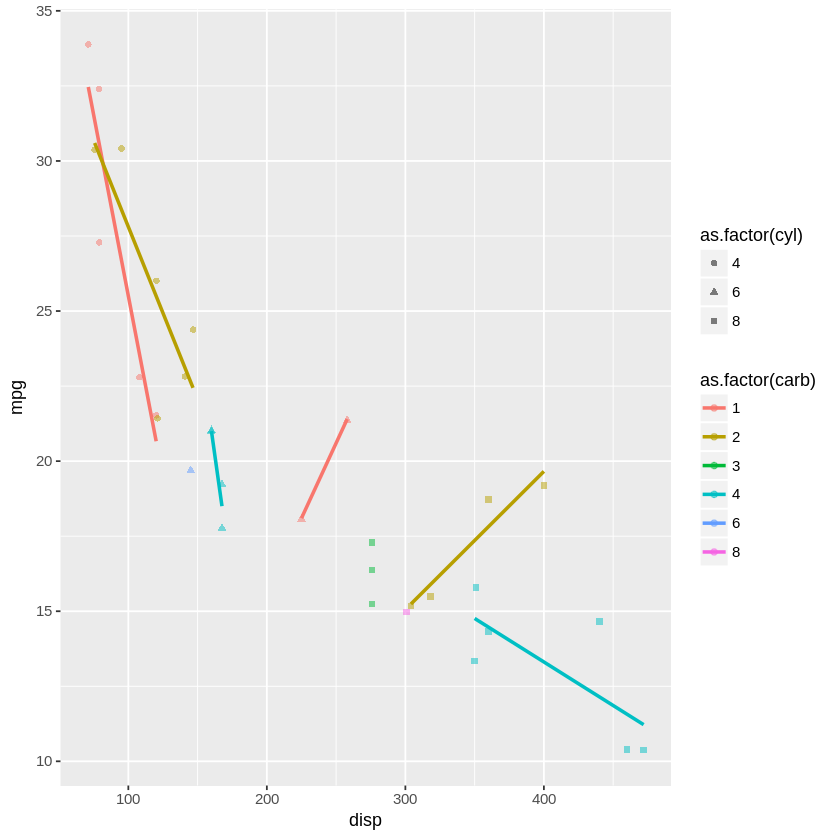

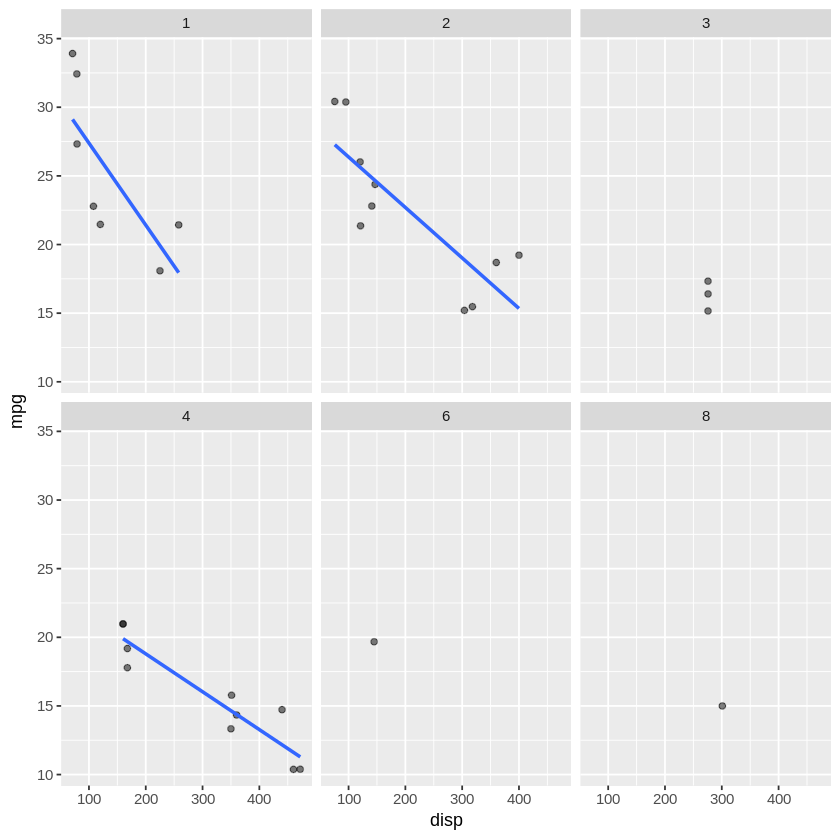

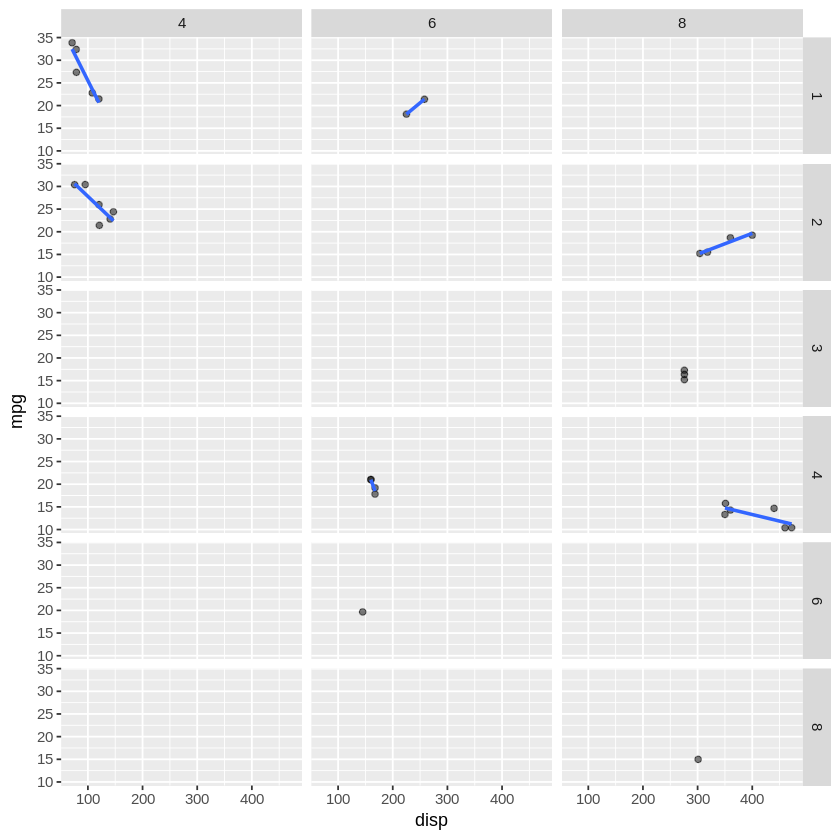

In [22]:
# Load libraries
library(tidyverse)

# Explore data structure
glimpse(mtcars)

# mpg vs disp with carb color and cyl shape
ggplot(mtcars, mapping = aes(x = disp, y = mpg, color = as.factor(carb), shape = as.factor(cyl))) + 
   geom_jitter(alpha = 0.5) + 
   geom_smooth(method = "lm", se = FALSE)

# mpg vs disp facet wrap by class
ggplot(mtcars, mapping = aes(x = disp, y = mpg)) +  
   geom_jitter(alpha = 0.5) + 
   geom_smooth(method = "lm", se = FALSE) + 
   facet_wrap(~ carb)

# mpg vs disp facet grid by class and cyl
ggplot(mtcars, mapping = aes(x = disp, y = mpg)) +  
   geom_jitter(alpha = 0.5) + 
   geom_smooth(method = "lm", se = FALSE) + 
   facet_grid(carb ~ cyl)